# Importing Library

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Setting Path And Count Data

In [2]:
# # Make Dataset Folder
# !mkdir -p /kaggle/working/dataset
# # Copy Train Data from RiceLeafsDisease
# !cp -r /kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/train /kaggle/working/dataset
# # Copy Validation Data from RiceLeafsDisease
# !cp -r /kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation /kaggle/working/dataset
# # Copy Train Healty

In [3]:
path = '/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease'
# Train
train_path = os.path.join(path, 'train')
print('Data Train')
train_bacterial_leaf_blight = os.path.join(train_path,'bacterial_leaf_blight')
train_brown_spot = os.path.join(train_path,'brown_spot')
train_healthy = os.path.join(train_path,'healthy')
# train_hispa = os.path.join(train_path,'Hispa')
train_leaf_blast = os.path.join(train_path,'leaf_blast')
train_leaf_scald = os.path.join(train_path,'leaf_scald')
train_narrow_brown_spot = os.path.join(train_path,'narrow_brown_spot')

print(f"Data Train Image Bacterial Leaf Blight \t\t= {len(os.listdir(train_bacterial_leaf_blight))} Image")
print(f"Data Train Image Brown Spot \t\t\t= {len(os.listdir(train_brown_spot))} Image")
print(f"Data Train Image Healthy \t\t\t= {len(os.listdir(train_healthy))} Image")
# print(f"Data Train Image Hispa \t\t= {len(os.listdir(train_hispa))} Image")
print(f"Data Train Image Leaf Blast \t\t\t= {len(os.listdir(train_leaf_blast))} Image")
print(f"Data Train Image Leaf Scald \t\t\t= {len(os.listdir(train_leaf_scald))} Image")
print(f"Data Train Image Narrow Brown Spot \t\t= {len(os.listdir(train_narrow_brown_spot))} Image")

print()

# Validation
val_path = os.path.join(path, 'validation')
print('Data Vaidation')
val_bacterial_leaf_blight = os.path.join(val_path,'bacterial_leaf_blight')
val_brown_spot = os.path.join(val_path,'brown_spot')
val_healthy = os.path.join(val_path,'healthy')
# val_hispa = os.path.join(val_path,'Hispa')
val_leaf_blast = os.path.join(val_path,'leaf_blast')
val_leaf_scald = os.path.join(val_path,'leaf_scald')
val_narrow_brown_spot = os.path.join(val_path,'narrow_brown_spot')

print(f"Data Validation Image Bacterial Leaf Blight \t= {len(os.listdir(val_bacterial_leaf_blight))} Image")
print(f"Data Validation Image Brown Spot \t\t= {len(os.listdir(val_brown_spot))} Image")
print(f"Data Validation Image Healthy \t\t\t= {len(os.listdir(val_healthy))} Image")
# print(f"Data Validation Image Hispa \t\t= {len(os.listdir(val_hispa))} Image")
print(f"Data Validation Image Leaf Blast \t\t= {len(os.listdir(val_leaf_blast))} Image")
print(f"Data Validation Image Leaf Scald \t\t= {len(os.listdir(val_leaf_scald))} Image")
print(f"Data Validation Image Narrow Brown Spot \t= {len(os.listdir(val_narrow_brown_spot))} Image")

Data Train
Data Train Image Bacterial Leaf Blight 		= 350 Image
Data Train Image Brown Spot 			= 350 Image
Data Train Image Healthy 			= 350 Image
Data Train Image Leaf Blast 			= 350 Image
Data Train Image Leaf Scald 			= 350 Image
Data Train Image Narrow Brown Spot 		= 350 Image

Data Vaidation
Data Validation Image Bacterial Leaf Blight 	= 88 Image
Data Validation Image Brown Spot 		= 88 Image
Data Validation Image Healthy 			= 88 Image
Data Validation Image Leaf Blast 		= 88 Image
Data Validation Image Leaf Scald 		= 88 Image
Data Validation Image Narrow Brown Spot 	= 88 Image


# Count Data Val and Train

In [4]:

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + " files"

print('total images for training :', count(train_path))
print('total images for validation :', count(val_path))

total images for training : /kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/train : 2100 files
total images for validation : /kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation : 528 files


# Setting Path Image

In [5]:
train_bacterial_leaf_blight_names = os.listdir(train_bacterial_leaf_blight)
print(train_bacterial_leaf_blight_names[:10])

train_brown_spot_names = os.listdir(train_brown_spot)
print(train_brown_spot_names[:10])

train_healthy_names =  os.listdir(train_healthy)
print(train_healthy_names[:10])

# train_Hispa_names = os.listdir(train_Hispa_dir)
# print(train_Hispa_names[:10])

train_leaf_blast_names =  os.listdir(train_leaf_blast)
print(train_leaf_blast_names[:10])

train_leaf_scald_names =  os.listdir(train_leaf_scald)
print(train_leaf_scald_names[:10])

train_narrow_brown_spot_names =  os.listdir(train_narrow_brown_spot)
print(train_narrow_brown_spot_names[:10])

['bacterial_leaf_blight (195).jpg', 'bacterial_leaf_blight (188).jpg', 'bacterial_leaf_blight (291).JPG', 'bacterial_leaf_blight (332).jpg', 'bacterial_leaf_blight (341).JPG', 'bacterial_leaf_blight (257).JPG', 'bacterial_leaf_blight (344).JPG', 'bacterial_leaf_blight (105).JPG', 'bacterial_leaf_blight (190).JPG', 'bacterial_leaf_blight (181).JPG']
['brown_spot (247).jpg', 'brown_spot (254).jpg', 'brown_spot (200).jpg', 'brown_spot (234).JPG', 'brown_spot (242).jpg', 'brown_spot (160).jpg', 'brown_spot (334).jpg', 'brown_spot (338).jpg', 'brown_spot (315).jpg', 'brown_spot (125).jpg']
['healthy (125).jpg', 'healthy (108).jpg', 'healthy (347).jpg', 'healthy (46).jpg', 'healthy (230).jpg', 'healthy (319).jpg', 'healthy (10).jpg', 'healthy (23).jpg', 'healthy (75).jpg', 'healthy (149).jpg']
['leaf_blast (117).jpg', 'leaf_blast (168).jpg', 'leaf_blast (194).jpg', 'leaf_blast (310).jpg', 'leaf_blast (142).jpg', 'leaf_blast (115).jpg', 'leaf_blast (233).jpg', 'leaf_blast (193).jpg', 'leaf_bl

# View Data

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Parameters for our graph; we'll outpu images in a 4x4 configuration
nrows = 4
ncols = 4

# for iternating over images
pic_index = 0

# Bacterial Leaf Blight

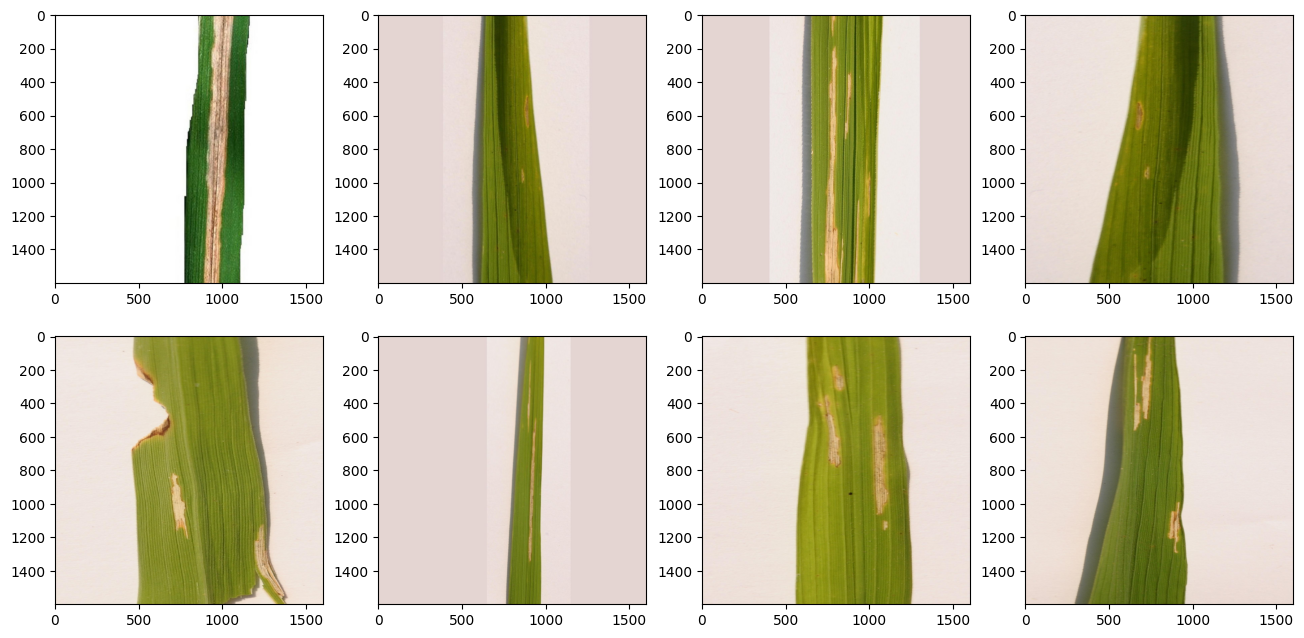

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows*4)

pic_index += 8
next_BrownSpot_pix = [os.path.join(train_bacterial_leaf_blight, fname)
                for fname in train_bacterial_leaf_blight_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_BrownSpot_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols,i +1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Brown Spot

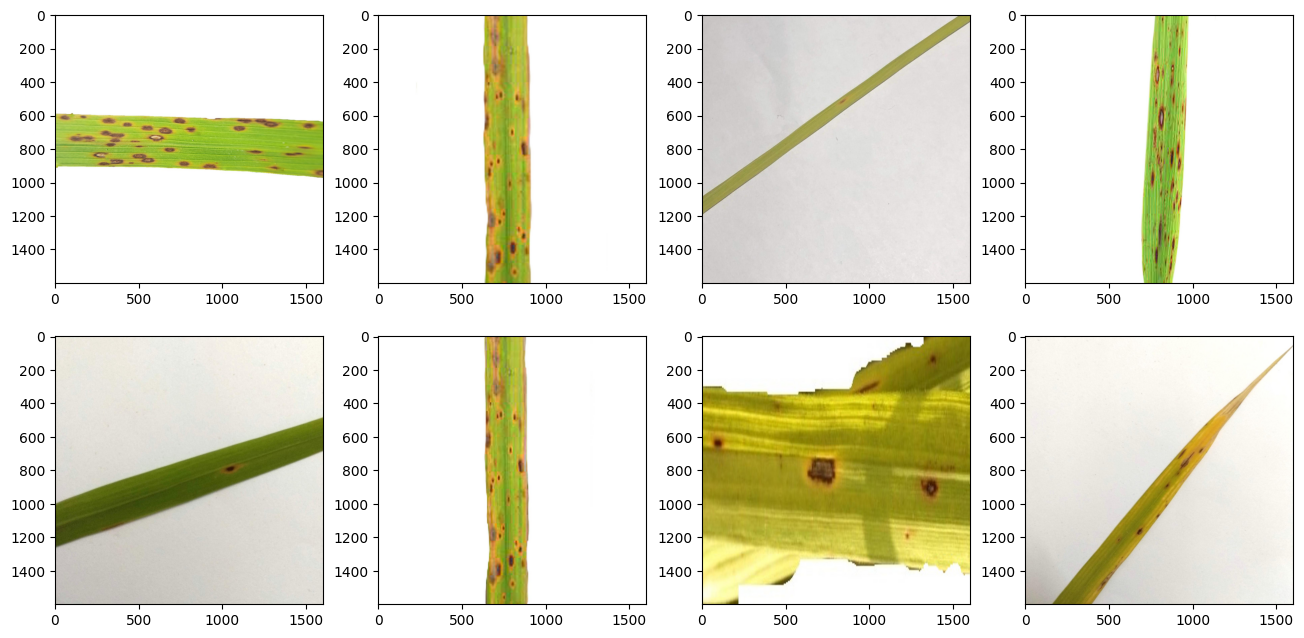

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows*4)

pic_index += 8
next_BrownSpot_pix = [os.path.join(train_brown_spot, fname)
                for fname in train_brown_spot_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_BrownSpot_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols,i +1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Healty

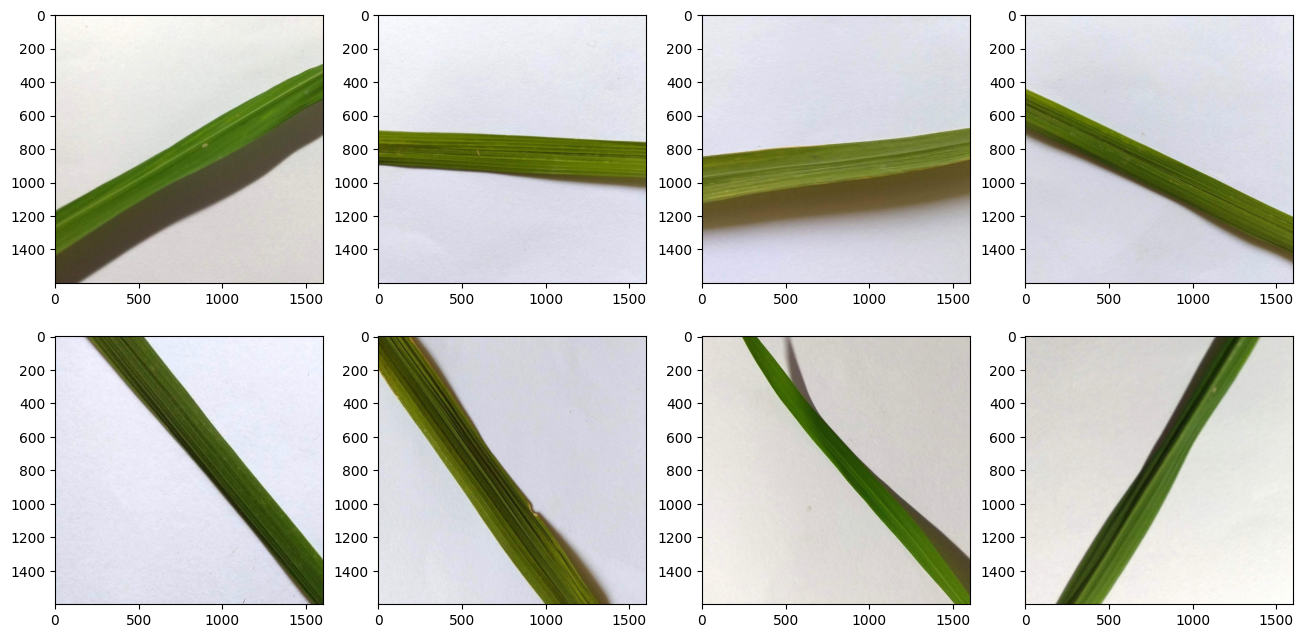

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows*4)

pic_index += 8
next_BrownSpot_pix = [os.path.join(train_healthy, fname)
                for fname in train_healthy_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_BrownSpot_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols,i +1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Leaf Blast

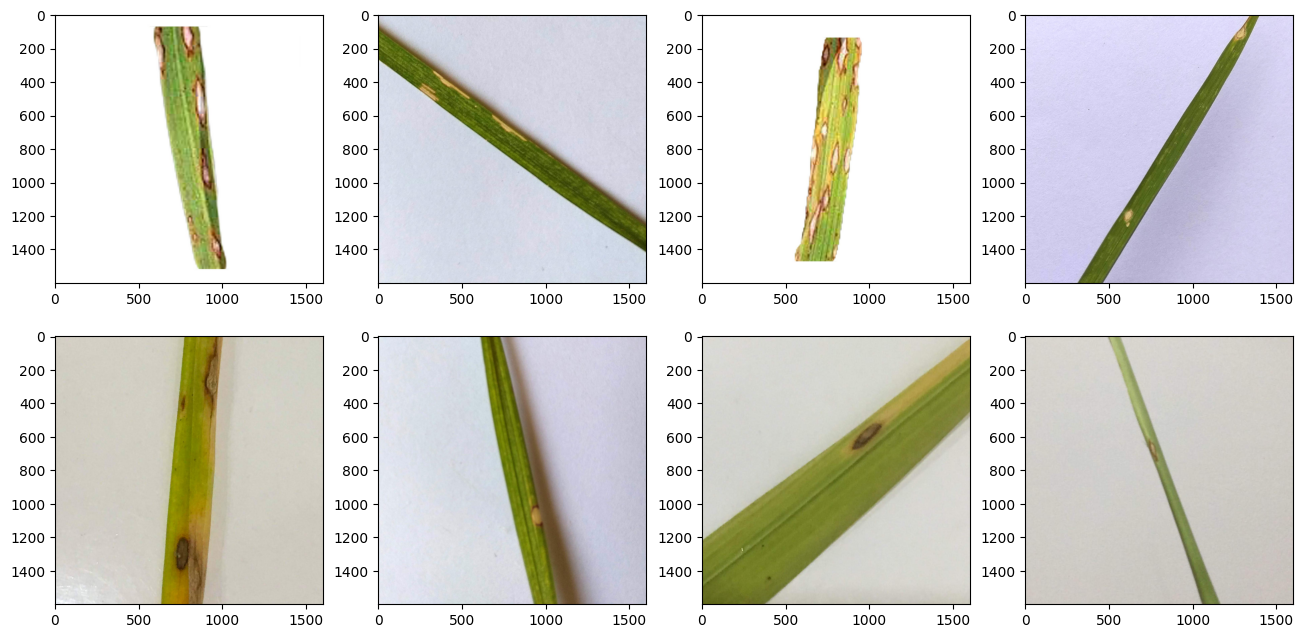

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows*4)

pic_index += 8
next_BrownSpot_pix = [os.path.join(train_leaf_blast, fname)
                for fname in train_leaf_blast_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_BrownSpot_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols,i +1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Leaf Scald

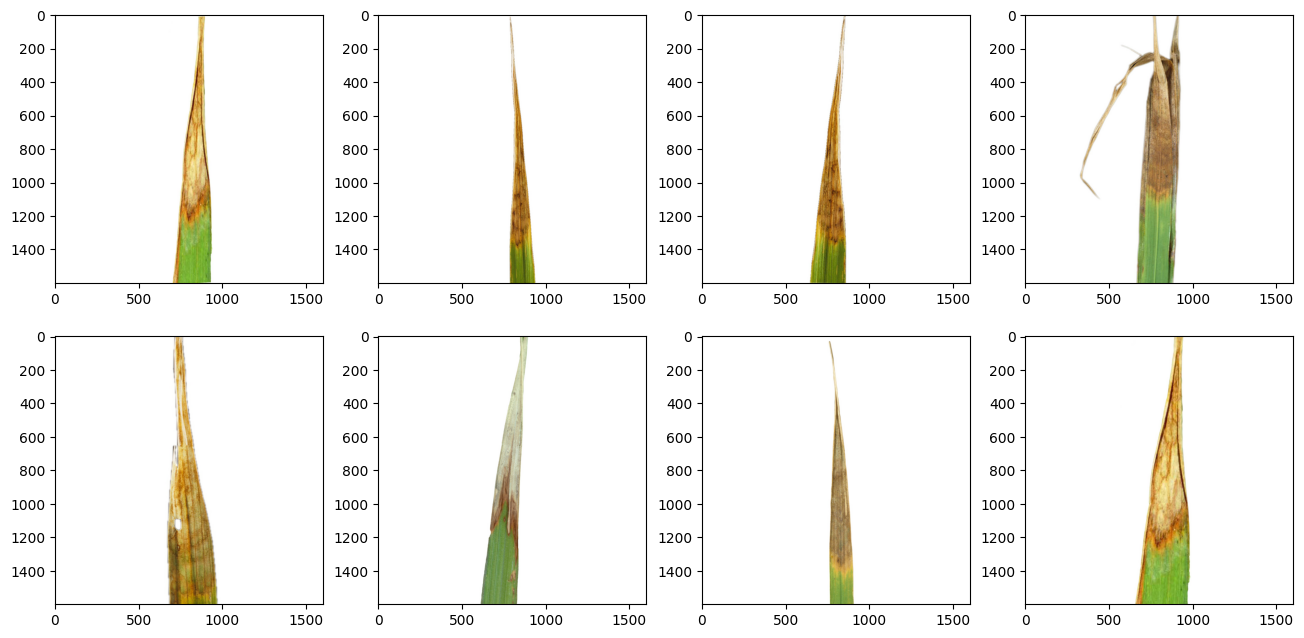

In [11]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows*4)

pic_index += 8
next_BrownSpot_pix = [os.path.join(train_leaf_scald, fname)
                for fname in train_leaf_scald_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_BrownSpot_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols,i +1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Narrow Brown Spot

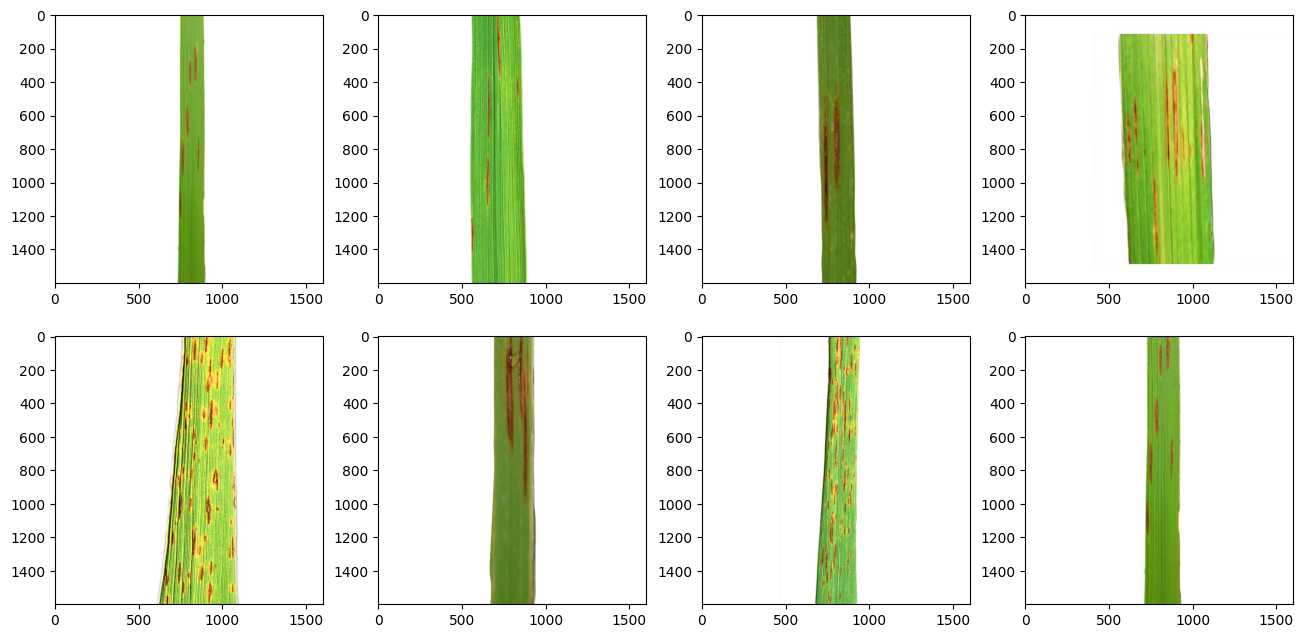

In [12]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows*4)

pic_index += 8
next_BrownSpot_pix = [os.path.join(train_narrow_brown_spot, fname)
                for fname in train_narrow_brown_spot_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_BrownSpot_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols,i +1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Data Augmentasi

In [13]:
def imageGenerator(train_dir, val_dir):
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')
    
    train_datagenerator = train_datagen.flow_from_directory(directory = train_dir,
                                                            batch_size = 32,
                                                            color_mode = 'rgb',
                                                            class_mode = 'categorical',
                                                            target_size = (150, 150)
                                                           )
    
    val_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
    
    val_datagenerator = val_datagen.flow_from_directory(directory = val_dir,
                                                        batch_size = 32,
                                                        color_mode = 'rgb',
                                                        class_mode = 'categorical',
                                                        target_size = (150, 150))
    
    return train_datagenerator, val_datagenerator

In [14]:
train_data, val_data = imageGenerator(train_path, val_path)

Found 2100 images belonging to 6 classes.
Found 528 images belonging to 6 classes.


# Make Model CNN

In [32]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), input_shape=(150, 150, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(524, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(6, activation='softmax')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [33]:
model = create_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 64)      

# Training Data

In [34]:
EPOCHS = 100
history = model.fit(train_data,
                    epochs = EPOCHS,
                    verbose=1,
                    validation_data = val_data)

Epoch 1/100
66/66 [==============================] - 46s 657ms/step - loss: 1.7778 - accuracy: 0.2005 - val_loss: 1.7363 - val_accuracy: 0.3314
Epoch 2/100
66/66 [==============================] - 40s 614ms/step - loss: 1.6158 - accuracy: 0.3624 - val_loss: 1.4072 - val_accuracy: 0.4905
Epoch 3/100
66/66 [==============================] - 39s 589ms/step - loss: 1.3282 - accuracy: 0.5005 - val_loss: 1.1912 - val_accuracy: 0.5852
Epoch 4/100
66/66 [==============================] - 39s 590ms/step - loss: 1.1448 - accuracy: 0.5690 - val_loss: 1.0157 - val_accuracy: 0.6383
Epoch 5/100
66/66 [==============================] - 39s 589ms/step - loss: 1.0469 - accuracy: 0.6024 - val_loss: 1.0814 - val_accuracy: 0.5777
Epoch 6/100
66/66 [==============================] - 39s 585ms/step - loss: 0.9982 - accuracy: 0.6381 - val_loss: 0.9774 - val_accuracy: 0.6553
Epoch 7/100
66/66 [==============================] - 39s 590ms/step - loss: 0.9359 - accuracy: 0.6619 - val_loss: 0.9048 - val_accuracy:

# Plot Loss dan Akurasi

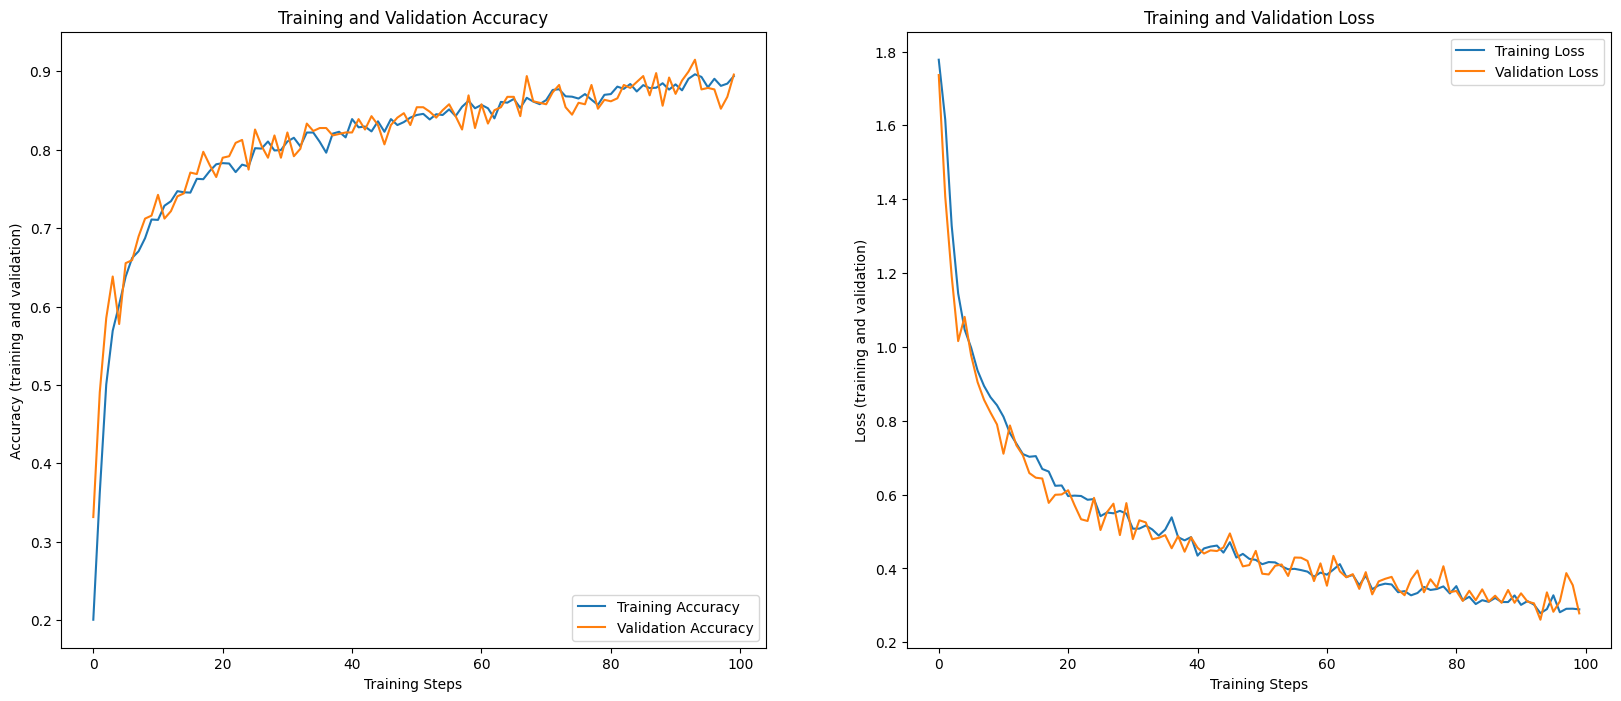

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

# Predict

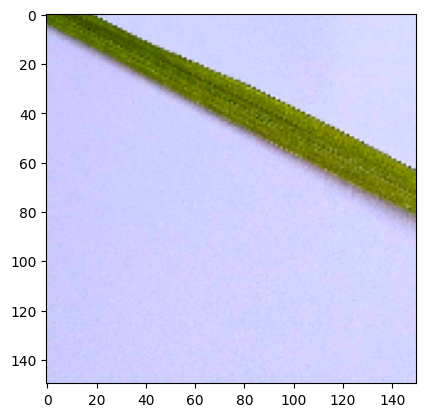

1/1 [==============================] - 0s 21ms/step
Narrow Brown Spot


In [37]:
# Path gambar yang akan diprediksi
image_path = '/kaggle/input/ab-cstm-riceleaf/train/Healthy/IMG_20190419_094929.jpg'

# # Membaca gambar dan melakukan pra-pemrosesan
# image = cv2.imread(image_path)
# image = cv2.resize(image, (150, 150))  # Mengubah ukuran gambar menjadi 500x500
# # image = image / 255.0  # Normalisasi piksel (asumsi nilai piksel dalam rentang 0-255)
# # image = image.astype(np.uint8)  # Mengubah tipe data menjadi uint8
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Mengubah mode warna BGR menjadi RGB
# # image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
image_load = load_img(image_path, target_size=(150, 150))
image = img_to_array(image_load)

# Menampilkan gambar hasil resize
plt.imshow(image.astype('uint8'))
# plt.axis('off')
plt.show()

x = np.expand_dims(image, axis=0)  # Menambahkan dimensi batch (batch size = 1)

# Melakukan prediksi menggunakan model
predictions = model.predict(x)

class_name = ['Bacterial Leaf Blight', 'Brown Spot', 'Healthy', 'Leaf Blast', 'Leaf Scald', 'Narrow Brown Spot']
# class_name = train_data.class_indices
# print(class_name)

# Menampilkan hasil prediksi
print(class_name[np.argmax(predictions)])


In [38]:
# Daftar folder yang berisi data untuk diprediksi
dataset_path = '/kaggle/input/data-test/datates'
folders = os.listdir(dataset_path)
folders

# Loop melalui setiap folder
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    images = os.listdir(folder_path)
    print(folder)

    # Loop melalui setiap gambar dalam folder
    for image_name in images:
        image_path = os.path.join(folder_path, image_name)
        image_load = load_img(image_path, target_size=(150, 150))
        image = img_to_array(image_load)
        
        # Menampilkan gambar hasil resize
#         plt.imshow(image.astype('uint8'))
        # plt.axis('off')  # Menghilangkan sumbu koordinat
#         plt.show()
        image = np.expand_dims(image, axis=0)

        # Memeriksa apakah gambar berhasil dibaca
        if image is not None:
            # Memanggil fungsi predict_image untuk memprediksi gambar
            prediction = model.predict(image)
            class_name = ['Bacterial Leaf Blight', 'Brown Spot', 'Healthy', 'Leaf Blast', 'Leaf Scald', 'Narrow Brown Spot']
            print(f"Image: {image_name} - Predicted Class: {class_name[np.argmax(prediction)]}")
        else:
            print(f"Failed to read image: {image_path}")
    print()

leaf scald
1/1 [==============================] - 0s 22ms/step
Image: test-4.jpg - Predicted Class: Leaf Scald
1/1 [==============================] - 0s 20ms/step
Image: test-1.jpeg - Predicted Class: Narrow Brown Spot
1/1 [==============================] - 0s 20ms/step
Image: test-5.jpg - Predicted Class: Narrow Brown Spot
1/1 [==============================] - 0s 20ms/step
Image: test-3.jpg - Predicted Class: Narrow Brown Spot
1/1 [==============================] - 0s 19ms/step
Image: test-2.jpeg - Predicted Class: Narrow Brown Spot

narrow brown spot
1/1 [==============================] - 0s 19ms/step
Image: test-4.jpg - Predicted Class: Narrow Brown Spot
1/1 [==============================] - 0s 19ms/step
Image: test-5.jpeg - Predicted Class: Narrow Brown Spot
1/1 [==============================] - 0s 19ms/step
Image: test-2.jpg - Predicted Class: Narrow Brown Spot
1/1 [==============================] - 0s 20ms/step
Image: test-1.jpeg - Predicted Class: Brown Spot
1/1 [============

# Save Model

In [40]:
model.save('modelv5.h5')